# Step 1: Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
pd.options.display.max_columns = None

In [2]:
# Load the Dataset in the notebook
df = pd.read_csv('HR-Employee-Attrition.csv')

# Display first 5 rows of the dataframe
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
# Number of rows and columns
df.shape

(1470, 35)

There are a total of 1470 records in 35 columns.

In [4]:
# checking for the null values present in the dataset
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We can see here that the dataset does not contain any null values in any columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Step 2: Lets Divide the dataset into Numerical and Categorical columns

In [6]:
# Categorical columns
df_object = df.loc[:, df.dtypes == np.object]

# Numerical columns
df_num = df.loc[:, df.dtypes == np.int64]

In [7]:
# first 5 recors in categorical columns
df_object.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [8]:
# first 5 recors in numerical columns
df_num.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


## Changing the categorical columns into numerical columns

In [9]:
df_object.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [10]:
# We will use OneHotEncoder from sklearn.preprocessing library.

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [11]:
for each in df_object.columns:
    ohe.fit_transform(df[[each]])
    print(f"{each}: ",ohe.categories_)
    print("\n")

Attrition:  [array(['No', 'Yes'], dtype=object)]


BusinessTravel:  [array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object)]


Department:  [array(['Human Resources', 'Research & Development', 'Sales'], dtype=object)]


EducationField:  [array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
       'Other', 'Technical Degree'], dtype=object)]


Gender:  [array(['Female', 'Male'], dtype=object)]


JobRole:  [array(['Healthcare Representative', 'Human Resources',
       'Laboratory Technician', 'Manager', 'Manufacturing Director',
       'Research Director', 'Research Scientist', 'Sales Executive',
       'Sales Representative'], dtype=object)]


MaritalStatus:  [array(['Divorced', 'Married', 'Single'], dtype=object)]


Over18:  [array(['Y'], dtype=object)]


OverTime:  [array(['No', 'Yes'], dtype=object)]




In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [13]:
le.fit(df_object['Attrition'])
df_object['attrition'] = le.fit_transform(df['Attrition'])
df_object.drop(['Attrition'], axis=1, inplace=True)
df_object.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,attrition
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,1
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,0
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,1
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,0
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,0


In [14]:
le.fit(df_object['BusinessTravel'])
df_object['businesstravel'] = le.fit_transform(df['BusinessTravel'])
df_object.drop(['BusinessTravel'], axis=1, inplace=True)
df_object.head()

,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,attrition,businesstravel
0,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,1,2
1,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,0,1
2,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,1,2
3,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,0,1
4,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,0,2


In [15]:
le.fit(df_object['Department'])
df_object['department'] = le.fit_transform(df['Department'])
df_object.drop(['Department'], axis=1, inplace=True)
df_object.head()

,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,attrition,businesstravel,department
0,Life Sciences,Female,Sales Executive,Single,Y,Yes,1,2,2
1,Life Sciences,Male,Research Scientist,Married,Y,No,0,1,1
2,Other,Male,Laboratory Technician,Single,Y,Yes,1,2,1
3,Life Sciences,Female,Research Scientist,Married,Y,Yes,0,1,1
4,Medical,Male,Laboratory Technician,Married,Y,No,0,2,1


In [16]:
le.fit(df_object['EducationField'])
df_object['educationfield'] = le.fit_transform(df['EducationField'])
df_object.drop(['EducationField'], axis=1, inplace=True)
df_object.head()

,Gender,JobRole,MaritalStatus,Over18,OverTime,attrition,businesstravel,department,educationfield
0,Female,Sales Executive,Single,Y,Yes,1,2,2,1
1,Male,Research Scientist,Married,Y,No,0,1,1,1
2,Male,Laboratory Technician,Single,Y,Yes,1,2,1,4
3,Female,Research Scientist,Married,Y,Yes,0,1,1,1
4,Male,Laboratory Technician,Married,Y,No,0,2,1,3


In [17]:
le.fit(df_object['Gender'])
df_object['gender'] = le.fit_transform(df['Gender'])
df_object.drop(['Gender'], axis=1, inplace=True)
df_object.head()

,JobRole,MaritalStatus,Over18,OverTime,attrition,businesstravel,department,educationfield,gender
0,Sales Executive,Single,Y,Yes,1,2,2,1,0
1,Research Scientist,Married,Y,No,0,1,1,1,1
2,Laboratory Technician,Single,Y,Yes,1,2,1,4,1
3,Research Scientist,Married,Y,Yes,0,1,1,1,0
4,Laboratory Technician,Married,Y,No,0,2,1,3,1


In [18]:
le.fit(df_object['JobRole'])
df_object['jobrole'] = le.fit_transform(df['JobRole'])
df_object.drop(['JobRole'], axis=1, inplace=True)
df_object.head()

,MaritalStatus,Over18,OverTime,attrition,businesstravel,department,educationfield,gender,jobrole
0,Single,Y,Yes,1,2,2,1,0,7
1,Married,Y,No,0,1,1,1,1,6
2,Single,Y,Yes,1,2,1,4,1,2
3,Married,Y,Yes,0,1,1,1,0,6
4,Married,Y,No,0,2,1,3,1,2


In [19]:
le.fit(df_object['MaritalStatus'])
df_object['maritalstatus'] = le.fit_transform(df['MaritalStatus'])
df_object.drop(['MaritalStatus'], axis=1, inplace=True)
df_object.head()

,Over18,OverTime,attrition,businesstravel,department,educationfield,gender,jobrole,maritalstatus
0,Y,Yes,1,2,2,1,0,7,2
1,Y,No,0,1,1,1,1,6,1
2,Y,Yes,1,2,1,4,1,2,2
3,Y,Yes,0,1,1,1,0,6,1
4,Y,No,0,2,1,3,1,2,1


In [20]:
le.fit(df_object['OverTime'])
df_object['overtime'] = le.fit_transform(df['OverTime'])
df_object.drop(['OverTime'], axis=1, inplace=True)
df_object.head()

,Over18,attrition,businesstravel,department,educationfield,gender,jobrole,maritalstatus,overtime
0,Y,1,2,2,1,0,7,2,1
1,Y,0,1,1,1,1,6,1,0
2,Y,1,2,1,4,1,2,2,1
3,Y,0,1,1,1,0,6,1,1
4,Y,0,2,1,3,1,2,1,0


In [21]:
# checking unique value sin Over18 column
df_object['Over18'].unique()

array(['Y'], dtype=object)

As per the information from Over18 column we can see that all the individuals in this dataset is above 18 years. Hence we can drop this column as it will have no impact on our analysis and model building.

In [22]:
df_object.drop(['Over18'], axis=1, inplace=True)
df_object.head()

,attrition,businesstravel,department,educationfield,gender,jobrole,maritalstatus,overtime
0,1,2,2,1,0,7,2,1
1,0,1,1,1,1,6,1,0
2,1,2,1,4,1,2,2,1
3,0,1,1,1,0,6,1,1
4,0,2,1,3,1,2,1,0


Hecne we have successfully converted our categorical columns into the numercial columns. This is stored in the dataframe : df_object

## Step 3: Now lets look into the numerical columns.

In [23]:
# display 5 records from numerical column

df_num.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [24]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   DailyRate                 1470 non-null   int64
 2   DistanceFromHome          1470 non-null   int64
 3   Education                 1470 non-null   int64
 4   EmployeeCount             1470 non-null   int64
 5   EmployeeNumber            1470 non-null   int64
 6   EnvironmentSatisfaction   1470 non-null   int64
 7   HourlyRate                1470 non-null   int64
 8   JobInvolvement            1470 non-null   int64
 9   JobLevel                  1470 non-null   int64
 10  JobSatisfaction           1470 non-null   int64
 11  MonthlyIncome             1470 non-null   int64
 12  MonthlyRate               1470 non-null   int64
 13  NumCompaniesWorked        1470 non-null   int64
 14  PercentSalaryHike         1470 non-null 

In [25]:
df_num.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [26]:
df_num.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

Lest now join the categorical and numerical column to have a new complete dataframe

In [27]:
# joining the df_object and df_num dataframe to form one complete dataframe.

df_new = pd.concat([df_object, df_num],axis=1)
df_new.head()

,attrition,businesstravel,department,educationfield,gender,jobrole,maritalstatus,overtime,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,2,2,1,0,7,2,1,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,0,1,1,1,1,6,1,0,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,1,2,1,4,1,2,2,1,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,0,1,1,1,0,6,1,1,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,0,2,1,3,1,2,1,0,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [28]:
# lets look into the correlation now

corr = df_new.corr()

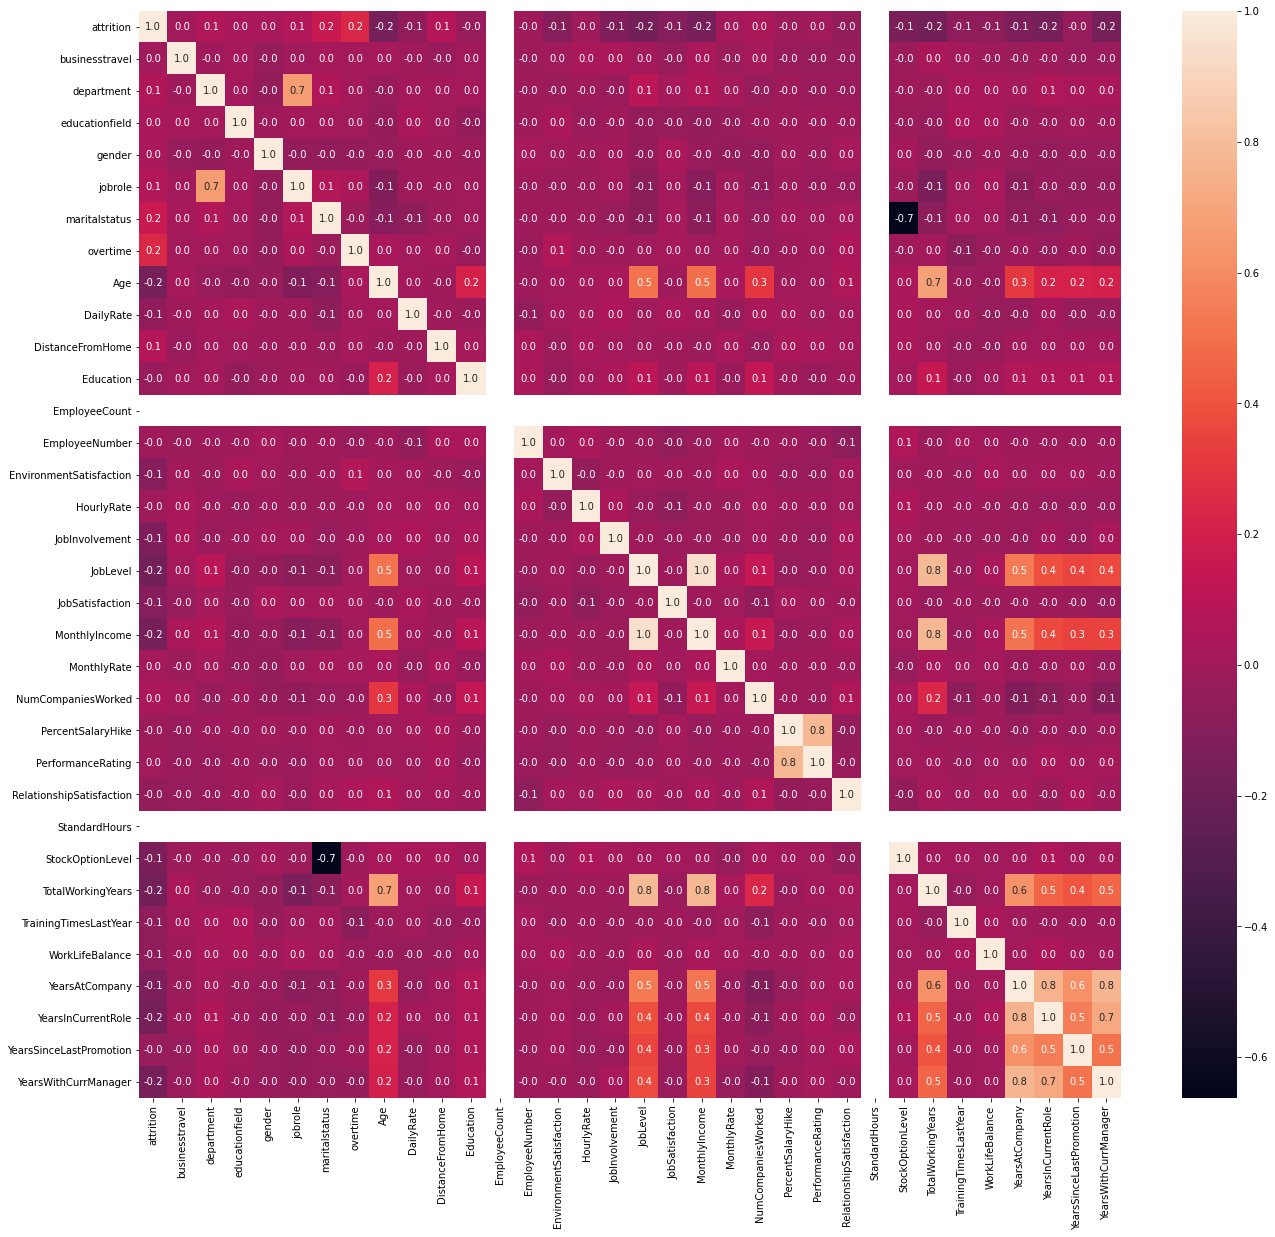

In [29]:
# presenting this correlation in form of heatmap

plt.figure(figsize=(22,20))
sns.heatmap(corr,annot=True, fmt='.1f')
plt.show()

Lets look into the features which has weak correlation with the attrition feature. Baiscally whatever we see with correlation s 0.0, will be termed as weak correlation 

In [30]:
df_new.columns

Index(['attrition', 'businesstravel', 'department', 'educationfield', 'gender',
       'jobrole', 'maritalstatus', 'overtime', 'Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Below are the columns which have very less correlation with the target feature variable i.e. attrition

In [31]:
col_weak_corr=['businesstravel','educationfield','gender','Education','EmployeeNumber','HourlyRate',
               'MonthlyRate','NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating', 
               'RelationshipSatisfaction','YearsSinceLastPromotion']

In [32]:
df_new_1 = df_new.drop(col_weak_corr, axis=1)
df_new_1.head()

,attrition,department,jobrole,maritalstatus,overtime,Age,DailyRate,DistanceFromHome,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,1,2,7,2,1,41,1102,1,1,2,3,2,4,5993,80,0,8,0,1,6,4,5
1,0,1,6,1,0,49,279,8,1,3,2,2,2,5130,80,1,10,3,3,10,7,7
2,1,1,2,2,1,37,1373,2,1,4,2,1,3,2090,80,0,7,3,3,0,0,0
3,0,1,6,1,1,33,1392,3,1,4,3,1,3,2909,80,0,8,3,3,8,7,0
4,0,1,2,1,0,27,591,2,1,1,3,1,2,3468,80,1,6,3,3,2,2,2


Lets do some visualiztion to get more insights for each feature.

In [33]:
# lets see some of the statistical features of each columns.
df_new_1.describe()

,attrition,department,jobrole,maritalstatus,overtime,Age,DailyRate,DistanceFromHome,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,1.260544,4.458503,1.097279,0.282993,36.923810,802.485714,9.192517,1.0,2.721769,2.729932,2.063946,2.728571,6502.931293,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,4.123129
std,0.367863,0.527792,2.461821,0.730121,0.450606,9.135373,403.509100,8.106864,0.0,1.093082,0.711561,1.106940,1.102846,4707.956783,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.568136
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,102.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1009.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,1.000000,0.000000,30.000000,465.000000,2.000000,1.0,2.000000,2.000000,1.000000,2.000000,2911.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,2.000000
50%,0.000000,1.000000,5.000000,1.000000,0.000000,36.000000,802.000000,7.000000,1.0,3.000000,3.000000,2.000000,3.000000,4919.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,3.000000
75%,0.000000,2.000000,7.000000,2.000000,1.000000,43.000000,1157.000000,14.000000,1.0,4.000000,3.000000,3.000000,4.000000,8379.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,7.000000
max,1.000000,2.000000,8.000000,2.000000,1.000000,60.000000,1499.000000,29.000000,1.0,4.000000,4.000000,5.000000,4.000000,19999.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,17.000000


MonthlyIncome seems to be very skewed as we see minimum value as 1009.000000 and the maximum value as 19999.000000. We will further more explore into the skewness.

In [34]:
# lets check for the skewness within this new dataframe df_new_1
df_new_1.skew()

attrition                  1.844366
department                 0.172231
jobrole                   -0.357270
maritalstatus             -0.152175
overtime                   0.964489
Age                        0.413286
DailyRate                 -0.003519
DistanceFromHome           0.958118
EmployeeCount              0.000000
EnvironmentSatisfaction   -0.321654
JobInvolvement            -0.498419
JobLevel                   1.025401
JobSatisfaction           -0.329672
MonthlyIncome              1.369817
StandardHours              0.000000
StockOptionLevel           0.968980
TotalWorkingYears          1.117172
TrainingTimesLastYear      0.553124
WorkLifeBalance           -0.552480
YearsAtCompany             1.764529
YearsInCurrentRole         0.917363
YearsWithCurrManager       0.833451
dtype: float64

As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

# Lets get the columns which have skewness more than 1 or less than -1.

1. attrition                  1.844366
2. JobLevel                   1.025401
3. MonthlyIncome              1.369817
4. TotalWorkingYears          1.117172
5. YearsAtCompany             1.764529

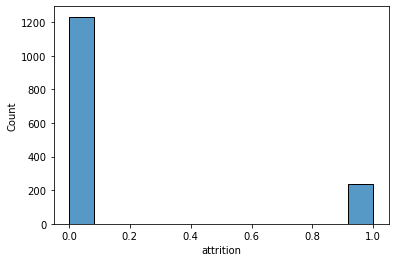

In [35]:
sns.histplot(data=df_new_1, x='attrition')
plt.show()

In [36]:
df_new_1.attrition.value_counts()

0    1233
1     237
Name: attrition, dtype: int64

Here we can see that the target variable attrition is imbalanced i.e. value 0 appears 1233 times where value 1 appears only 237 time. Hence we need to balance our target variable.

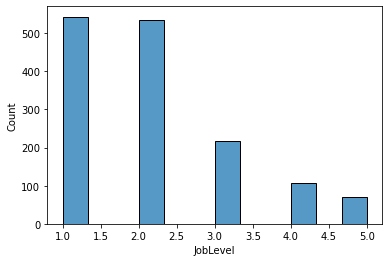

In [37]:
sns.histplot(data=df_new_1, x='JobLevel')
plt.show()

In [38]:
print(df_new_1['JobLevel'].min())
print(df_new_1['JobLevel'].max())
print(df_new_1['JobLevel'].unique())

1
5
[2 1 3 4 5]


JobLevel is also a categorical variable hence no need to worry about the skewness.

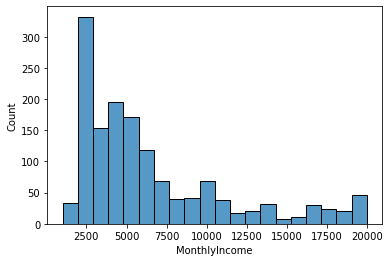

In [39]:
sns.histplot(data=df_new_1, x='MonthlyIncome')
plt.show()

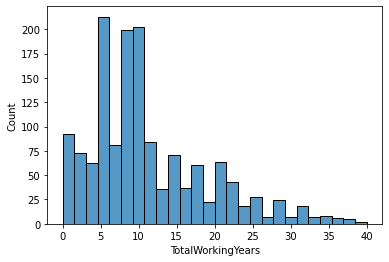

In [40]:
sns.histplot(data=df_new_1, x='TotalWorkingYears')
plt.show()

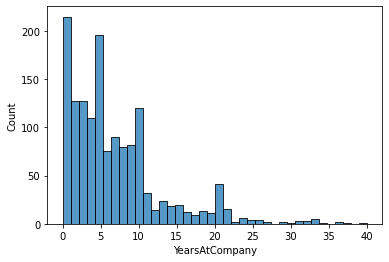

In [41]:
sns.histplot(data=df_new_1, x='YearsAtCompany')
plt.show()

Here we see that MonthlyIncome, TotalWorkingYears and YearsAtCompany are right skewed normal distribution. we will use the log1p function from the numpy library to treat the skewness.

In [42]:
df_new_1['YearsAtCompany'] = np.log1p(df_new_1['YearsAtCompany'])

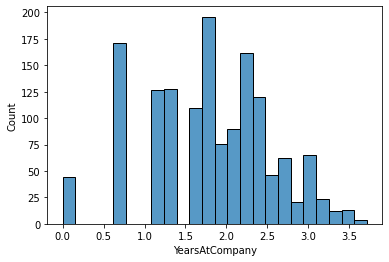

In [43]:
sns.histplot(data=df_new_1, x='YearsAtCompany')
plt.show()

In [44]:
df_new_1['YearsAtCompany'].skew()

-0.20770795300104433

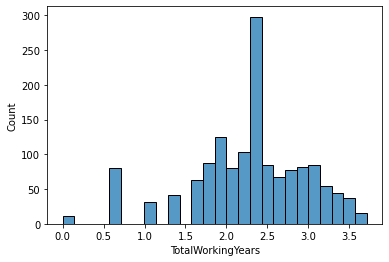

In [45]:
df_new_1['TotalWorkingYears'] = np.log1p(df_new_1['TotalWorkingYears'])
sns.histplot(data=df_new_1, x='TotalWorkingYears')
plt.show()

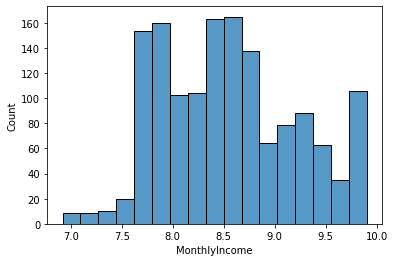

In [46]:
df_new_1['MonthlyIncome'] = np.log1p(df_new_1['MonthlyIncome'])
sns.histplot(data=df_new_1, x='MonthlyIncome')
plt.show()

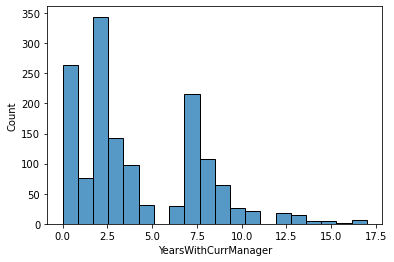

In [47]:
sns.histplot(data=df_new_1, x='YearsWithCurrManager')
plt.show()

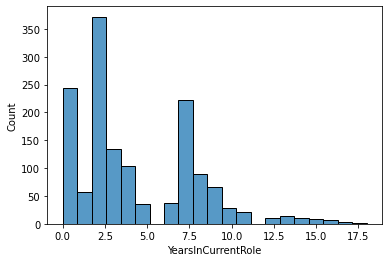

In [48]:
sns.histplot(data=df_new_1, x='YearsInCurrentRole')
plt.show()

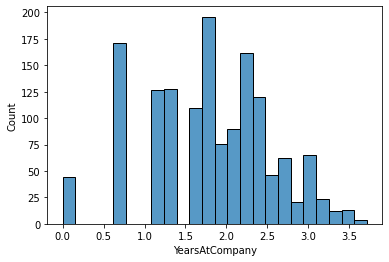

In [49]:
sns.histplot(data=df_new_1, x='YearsAtCompany')
plt.show()

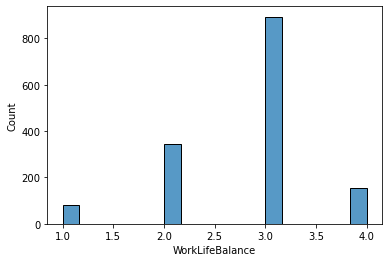

In [50]:
sns.histplot(data=df_new_1, x='WorkLifeBalance')
plt.show()

In [51]:
df_new_1.head()

,attrition,department,jobrole,maritalstatus,overtime,Age,DailyRate,DistanceFromHome,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,1,2,7,2,1,41,1102,1,1,2,3,2,4,8.698514,80,0,2.197225,0,1,1.945910,4,5
1,0,1,6,1,0,49,279,8,1,3,2,2,2,8.543056,80,1,2.397895,3,3,2.397895,7,7
2,1,1,2,2,1,37,1373,2,1,4,2,1,3,7.645398,80,0,2.079442,3,3,0.000000,0,0
3,0,1,6,1,1,33,1392,3,1,4,3,1,3,7.975908,80,0,2.197225,3,3,2.197225,7,0
4,0,1,2,1,0,27,591,2,1,1,3,1,2,8.151622,80,1,1.945910,3,3,1.098612,2,2


Dividing the datset into x(predictors) and y(target)

In [52]:
y = df_new_1['attrition']
x = df_new_1.drop(['attrition'], axis=1)

In [53]:
x.head()

,department,jobrole,maritalstatus,overtime,Age,DailyRate,DistanceFromHome,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,2,7,2,1,41,1102,1,1,2,3,2,4,8.698514,80,0,2.197225,0,1,1.945910,4,5
1,1,6,1,0,49,279,8,1,3,2,2,2,8.543056,80,1,2.397895,3,3,2.397895,7,7
2,1,2,2,1,37,1373,2,1,4,2,1,3,7.645398,80,0,2.079442,3,3,0.000000,0,0
3,1,6,1,1,33,1392,3,1,4,3,1,3,7.975908,80,0,2.197225,3,3,2.197225,7,0
4,1,2,1,0,27,591,2,1,1,3,1,2,8.151622,80,1,1.945910,3,3,1.098612,2,2


In [54]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: attrition, dtype: int64

Finding the best random state to find the divide x and y into test and train dataset

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [56]:
random_state=0
accu=0

for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred = lg.predict(x_test)
    tempaccu = accuracy_score(y_pred,y_test)
    if tempaccu > accu:
        accu = tempaccu
        random_state = i
print(f"Best Accuracy {accu*100} found on Random state {random_state}")

Best Accuracy 90.47619047619048 found on Random state 35


The best accuracy of 90.47 is found at Random state 35

In [57]:
# creating train test split using the best random state which we found above
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=35)

Finding the best Model

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [59]:
algorithms = [LogisticRegression,RandomForestClassifier,SGDClassifier,DecisionTreeClassifier,
        KNeighborsClassifier,GaussianNB]

for each in algorithms:
    model = each()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracyscore = accuracy_score(y_test,y_pred)
    cvscore = cross_val_score(each(), x_train, y_train, cv=5).mean()
    print(f"{model}\n",classification_report(y_test, y_pred))
    print("\n")
    print(f"Accuracy= {accuracyscore*100}, cross_val_score= {cvscore*100} & difference= {(accuracyscore*100)-(cvscore*100)}")
    print("*****************************************************************************************************************")
    print("\n")

LogisticRegression()
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       256
           1       0.86      0.32      0.46        38

    accuracy                           0.90       294
   macro avg       0.88      0.65      0.70       294
weighted avg       0.90      0.90      0.88       294



Accuracy= 90.47619047619048, cross_val_score= 85.37396321673278 & difference= 5.102227259457706
*****************************************************************************************************************


RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       256
           1       0.65      0.29      0.40        38

    accuracy                           0.89       294
   macro avg       0.77      0.63      0.67       294
weighted avg       0.87      0.89      0.87       294



Accuracy= 88.77551020408163, cross_val_score= 85.37432383699965 & difference= 3.40

# From the above result we can interpret that LogisticRegression will correctly classify if there will be attrition for a particular employee 90% of the time
Accuracy= 90.47619047619048, cross_val_score= 85.37396321673278 & difference= 5.102227259457706